In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import gudhi as gd
import gudhi.wasserstein
import itertools

import tadasets
from datetime import datetime

from tqdm.notebook import tqdm

import ecc_gudhi
import ecc_recursive
import ecc_sequential
import ecc_sequential_CPP
import compute_local_EC
import ecc_utils

In [2]:
# https://anaconda.org/conda-forge/memory_profiler
%load_ext memory_profiler

In [3]:
%load_ext line_profiler

In [4]:
def compute_ECC_from_simplextree(st):
    local_contributions = {} # dict {filtration: contribution}

    simplex_counter = 0

    for simplex, filtration in st.get_filtration():
        contribution = (-1)**(len(simplex)-1) # len(simplex) - 1 = dimension of the simplex
        # store the contribution at the right filtration value
        local_contributions[filtration] = local_contributions.get(filtration, 0) + contribution

        simplex_counter += 1

    # remove the contributions that are 0
    to_del = []
    for key in local_contributions:
        if local_contributions[key] == 0:
            to_del.append(key)

    for key in to_del:
        del local_contributions[key]

    # convert the dict into a list, sort it according to the filtration and return it
    return sorted(list(local_contributions.items()), key = lambda x: x[0]), simplex_counter

## Rhomboid

	 simplicies found:           15
	 points in the ecc plot:     6


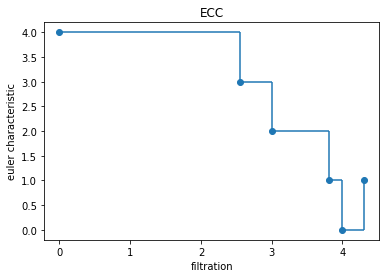

In [5]:
epsilon = 10

#point_cloud_1 = np.array([[4,0], [0,3.5], [-2, 0], [-0.5, -3]])

point_cloud_1 = np.array([[0,0], [0,3], [4, 0], [2.5, 3.5]])

rips_complex_1 = gd.RipsComplex(points=point_cloud_1, max_edge_length=epsilon)
simplex_tree_1 = rips_complex_1.create_simplex_tree(max_dimension=len(point_cloud_1)-1)




c_1, ns_1 = compute_ECC_from_simplextree(simplex_tree_1)
print("\t simplicies found:          ", ns_1)

ecc_1 = ecc_utils.euler_characteristic_list_from_all(c_1)
print("\t points in the ecc plot:    ", len(ecc_1))

ecc_utils.plot_euler_curve(ecc_1, True, "ECC")

simplex_tree_1.compute_persistence(persistence_dim_max=True, min_persistence=-1)

	 simplicies found:           15
	 points in the ecc plot:     6


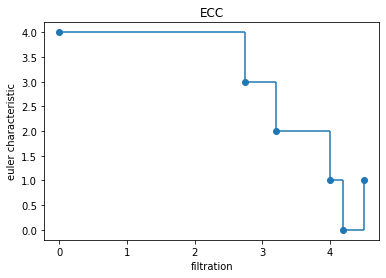

In [6]:
simplex_tree_2 = gd.SimplexTree()

for s in simplex_tree_1.get_filtration():
    f = s[1]
    if len(s[0]) > 1:
        f += 0.2
    simplex_tree_2.insert(s[0], filtration=f)
    
c_2, ns_2 = compute_ECC_from_simplextree(simplex_tree_2)
print("\t simplicies found:          ", ns_2)

ecc_2 = ecc_utils.euler_characteristic_list_from_all(c_2)
print("\t points in the ecc plot:    ", len(ecc_2))

ecc_utils.plot_euler_curve(ecc_2, True, "ECC")

simplex_tree_2.compute_persistence(persistence_dim_max=True, min_persistence=-1)

In [7]:
ecc_dist = ecc_utils.difference_ECC(ecc_1, ecc_2, 10)
print(ecc_dist)

1.0000000000000009


In [8]:
w1_list = []

for i in range(len(point_cloud_1)):
    
    X = np.array([p for p in simplex_tree_1.persistence_intervals_in_dimension(i) if p[1] != np.inf])
    Y = np.array([p for p in simplex_tree_2.persistence_intervals_in_dimension(i) if p[1] != np.inf])
    
    w1_list.append(gudhi.wasserstein.wasserstein_distance(X, Y))

tot_w1 = w1_list[0]
for w_i in w1_list[1:]:
    tot_w1 += 2*w_i
    
print(tot_w1)

assert(ecc_dist <= tot_w1)

1.0000000000000009


# example

	 simplicies found:           127
	 points in the ecc plot:     9


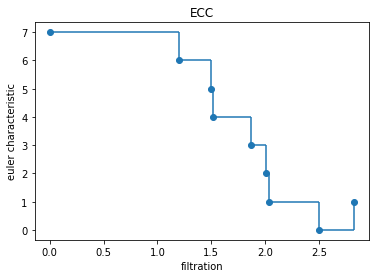

In [9]:
epsilon = 10

point_cloud_1 = np.array([[0,0], [2,-0.2], [4,0.2], [0,-1.5], [2,-3], [4,-1], [3.8,-2.5]] )

rips_complex_1 = gd.RipsComplex(points=point_cloud_1, max_edge_length=epsilon)
simplex_tree_1 = rips_complex_1.create_simplex_tree(max_dimension=len(point_cloud_1)-1)




c_1, ns_1 = compute_ECC_from_simplextree(simplex_tree_1)
print("\t simplicies found:          ", ns_1)

ecc_1 = ecc_utils.euler_characteristic_list_from_all(c_1)
print("\t points in the ecc plot:    ", len(ecc_1))

ecc_utils.plot_euler_curve(ecc_1, True, "ECC")

simplex_tree_1.compute_persistence(persistence_dim_max=True, min_persistence=-1)

	 simplicies found:           127
	 points in the ecc plot:     9


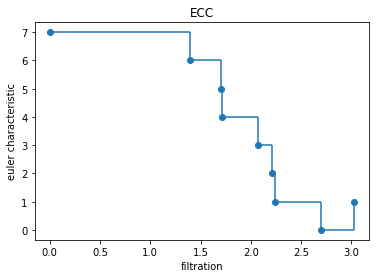

In [10]:
simplex_tree_2 = gd.SimplexTree()

for s in simplex_tree_1.get_filtration():
    f = s[1]
    if len(s[0]) > 1:
        f += 0.2
    simplex_tree_2.insert(s[0], filtration=f)

simplex_tree_2.compute_persistence(persistence_dim_max=True, min_persistence=-1)    
    
c_2, ns_2 = compute_ECC_from_simplextree(simplex_tree_2)
print("\t simplicies found:          ", ns_2)

ecc_2 = ecc_utils.euler_characteristic_list_from_all(c_2)
print("\t points in the ecc plot:    ", len(ecc_2))

ecc_utils.plot_euler_curve(ecc_2, True, "ECC")

In [11]:
ecc_dist = ecc_utils.difference_ECC(ecc_1, ecc_2, 10)

In [12]:
w1_list = []

simplex_tree_1


for i in range(len(point_cloud_1)):
    
    X = np.array([p for p in simplex_tree_1.persistence_intervals_in_dimension(i) if p[1] != np.inf])
    Y = np.array([p for p in simplex_tree_2.persistence_intervals_in_dimension(i) if p[1] != np.inf])
    
    w1_list.append(gudhi.wasserstein.wasserstein_distance(X, Y))

tot_w1 = w1_list[0]
for w_i in w1_list[1:]:
    tot_w1 += 2*w_i
    
print(tot_w1)

assert(ecc_dist <= tot_w1)

1.6000000000000005


# example 2

	 simplicies found:           127
	 points in the ecc plot:     9


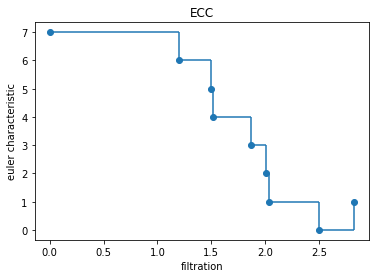

In [13]:
epsilon = 10

point_cloud_1 = np.array([[0,0], [2,-0.2], [4,0.2], [0,-1.5], [2,-3], [4,-1], [3.8,-2.5]] )

rips_complex_1 = gd.RipsComplex(points=point_cloud_1, max_edge_length=epsilon)
simplex_tree_1 = rips_complex_1.create_simplex_tree(max_dimension=len(point_cloud_1)-1)




c_1, ns_1 = compute_ECC_from_simplextree(simplex_tree_1)
print("\t simplicies found:          ", ns_1)

ecc_1 = ecc_utils.euler_characteristic_list_from_all(c_1)
print("\t points in the ecc plot:    ", len(ecc_1))

ecc_utils.plot_euler_curve(ecc_1, True, "ECC")

simplex_tree_1.compute_persistence(persistence_dim_max=True, min_persistence=-1)

	 simplicies found:           127
	 points in the ecc plot:     9


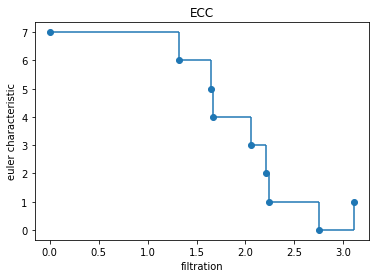

In [14]:
epsilon = 10

point_cloud_2 = point_cloud_1 * 1.1

rips_complex_2 = gd.RipsComplex(points=point_cloud_2, max_edge_length=epsilon)
simplex_tree_2 = rips_complex_2.create_simplex_tree(max_dimension=len(point_cloud_2)-1)

simplex_tree_2.compute_persistence(persistence_dim_max=True, min_persistence=-1)    
    
c_2, ns_2 = compute_ECC_from_simplextree(simplex_tree_2)
print("\t simplicies found:          ", ns_2)

ecc_2 = ecc_utils.euler_characteristic_list_from_all(c_2)
print("\t points in the ecc plot:    ", len(ecc_2))

ecc_utils.plot_euler_curve(ecc_2, True, "ECC")

In [15]:
ecc_dist = ecc_utils.difference_ECC(ecc_1, ecc_2, 10)
print(ecc_dist)

1.545943881867658


In [16]:
w1_list = []

for i in range(len(point_cloud_1)):
    
    X = np.array([p for p in simplex_tree_1.persistence_intervals_in_dimension(i) if p[1] != np.inf])
    Y = np.array([p for p in simplex_tree_2.persistence_intervals_in_dimension(i) if p[1] != np.inf])
    
    w1_list.append(gudhi.wasserstein.wasserstein_distance(X, Y))

tot_w1 = w1_list[0]
for w_i in w1_list[1:]:
    tot_w1 += 2*w_i
    
print(tot_w1)

assert(ecc_dist <= tot_w1)

1.5787865943422765


# circle

In [95]:
epsilon = 10
NUMBER_OF_POINTS = 20
NUMBER_OF_POINTS_2 = 10

	 simplicies found:           1048575
	 points in the ecc plot:     30
CPU times: user 11.2 s, sys: 141 ms, total: 11.4 s
Wall time: 13.3 s


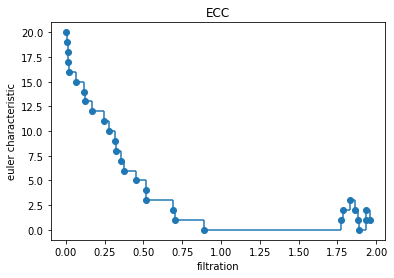

In [96]:
%%time
point_cloud_1 = []

random.seed(42)
for i in range(NUMBER_OF_POINTS):
    angle = random.uniform(0,2*np.pi)
    point_cloud_1.append([np.cos(angle), np.sin(angle)])
    
point_cloud_1 = np.array(point_cloud_1)

rips_complex_1 = gd.RipsComplex(points=point_cloud_1, max_edge_length=epsilon)
simplex_tree_1 = rips_complex_1.create_simplex_tree(max_dimension=len(point_cloud_1)-1)


c_1, ns_1 = compute_ECC_from_simplextree(simplex_tree_1)
print("\t simplicies found:          ", ns_1)

ecc_1 = ecc_utils.euler_characteristic_list_from_all(c_1)
print("\t points in the ecc plot:    ", len(ecc_1))

ecc_utils.plot_euler_curve(ecc_1, True, "ECC")

simplex_tree_1.compute_persistence(persistence_dim_max=True, min_persistence=-1)

	 simplicies found:           1023
	 points in the ecc plot:     14
CPU times: user 86.3 ms, sys: 4.6 ms, total: 90.9 ms
Wall time: 106 ms


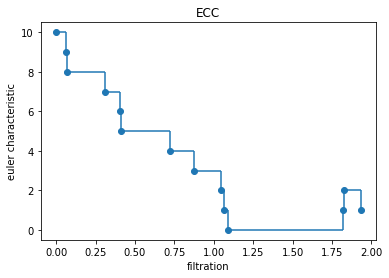

In [97]:
%%time
point_cloud_2 = []

random.seed(66)
for i in range(NUMBER_OF_POINTS_2):
    angle = random.uniform(0,2*np.pi)
    point_cloud_2.append([np.cos(angle), np.sin(angle)])
    
point_cloud_2 = np.array(point_cloud_2)

rips_complex_2 = gd.RipsComplex(points=point_cloud_2, max_edge_length=epsilon)
simplex_tree_2 = rips_complex_2.create_simplex_tree(max_dimension=len(point_cloud_2)-1)


c_2, ns_2 = compute_ECC_from_simplextree(simplex_tree_2)
print("\t simplicies found:          ", ns_2)

ecc_2 = ecc_utils.euler_characteristic_list_from_all(c_2)
print("\t points in the ecc plot:    ", len(ecc_2))

ecc_utils.plot_euler_curve(ecc_2, True, "ECC")

simplex_tree_2.compute_persistence(persistence_dim_max=True, min_persistence=-1)

In [98]:
ecc_1[-1] 

[1.961022421160457, 1]

In [99]:
ecc_2[-1]

[1.9304359480213305, 1]

In [100]:
ecc_dist = ecc_utils.difference_ECC(ecc_1, ecc_2, 10)
print(ecc_dist)

3.423837412060018


In [102]:
w1_list = []

for i in tqdm(range(max(simplex_tree_1.dimension(), simplex_tree_2.dimension()) + 1)):
    
    X = np.array([p for p in simplex_tree_1.persistence_intervals_in_dimension(i) if (p[1]!=np.inf) and (p[0]!=p[1])])
    Y = np.array([p for p in simplex_tree_2.persistence_intervals_in_dimension(i) if (p[1]!=np.inf) and (p[0]!=p[1])])
    
    print(i, len(X), len(Y))

    
    w1_list.append(gudhi.wasserstein.wasserstein_distance(X, Y))

tot_w1 = 0
for w_i in w1_list:
    tot_w1 += 2*w_i
    
print(tot_w1)

assert(ecc_dist <= tot_w1)

  0%|          | 0/20 [00:00<?, ?it/s]

0 19 9
1 1 1
2 2 1
3 1 0
4 1 0
5 0 0
6 0 0
7 0 0
8 0 0
9 0 0
10 0 0
11 0 0
12 0 0
13 0 0
14 0 0
15 0 0
16 0 0
17 0 0
18 0 0
19 0 0
5.004482712995815


# BOX

In [86]:
epsilon = 100
NUMBER_OF_POINTS = 20
NUMBER_OF_POINTS_2 = 5
# random points in the unit cube

DIMENSION = 3

	 simplicies found:           1048575
	 points in the ecc plot:     28
CPU times: user 11.2 s, sys: 120 ms, total: 11.4 s
Wall time: 12.8 s


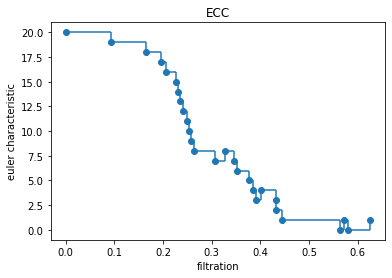

In [87]:
%%time
np.random.seed(42)

point_cloud_1 = np.random.rand(NUMBER_OF_POINTS,DIMENSION)

rips_complex_1 = gd.RipsComplex(points=point_cloud_1, max_edge_length=epsilon)
simplex_tree_1 = rips_complex_1.create_simplex_tree(max_dimension=len(point_cloud_1)-1)


c_1, ns_1 = compute_ECC_from_simplextree(simplex_tree_1)
print("\t simplicies found:          ", ns_1)

ecc_1 = ecc_utils.euler_characteristic_list_from_all(c_1)
print("\t points in the ecc plot:    ", len(ecc_1))

ecc_utils.plot_euler_curve(ecc_1, True, "ECC")

simplex_tree_1.compute_persistence(persistence_dim_max=True, min_persistence=-1)

	 simplicies found:           31
	 points in the ecc plot:     5
CPU times: user 246 ms, sys: 5.42 ms, total: 252 ms
Wall time: 299 ms


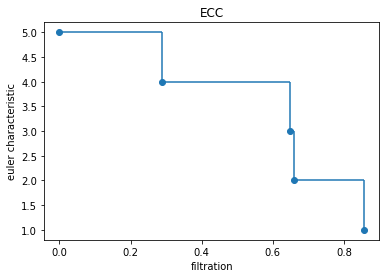

In [88]:
%%time
random.seed(66)

point_cloud_2 = np.random.rand(NUMBER_OF_POINTS_2,DIMENSION)

rips_complex_2 = gd.RipsComplex(points=point_cloud_2, max_edge_length=epsilon)
simplex_tree_2 = rips_complex_2.create_simplex_tree(max_dimension=len(point_cloud_2)-1)


c_2, ns_2 = compute_ECC_from_simplextree(simplex_tree_2)
print("\t simplicies found:          ", ns_2)

ecc_2 = ecc_utils.euler_characteristic_list_from_all(c_2)
print("\t points in the ecc plot:    ", len(ecc_2))

ecc_utils.plot_euler_curve(ecc_2, True, "ECC")

simplex_tree_2.compute_persistence(persistence_dim_max=True, min_persistence=-1)

In [89]:
# ecc_1_norm = []

# for  ec in ecc_1:
#     ecc_1_norm.append([ec[0], ec[1] / NUMBER_OF_POINTS])

In [90]:
# ecc_2_norm = []

# for ec in ecc_2:
#     ecc_2_norm.append([ec[0], ec[1] / NUMBER_OF_POINTS_2])

In [91]:
ecc_dist = ecc_utils.difference_ECC(ecc_1, ecc_2, 10)
print(ecc_dist)

4.680372848766966


In [92]:
# ecc_utils.plot_euler_curve(ecc_1_norm, True, "ECC")
# ecc_utils.plot_euler_curve(ecc_2_norm, True, "ECC")

In [93]:
# ecc_NORM_dist = ecc_utils.difference_ECC(ecc_1_norm, ecc_2_norm, 10)
# print(ecc_NORM_dist)

In [94]:
w1_list = []
w1_NORM_list = []


for i in tqdm(range(max(simplex_tree_1.dimension(), simplex_tree_2.dimension()) + 1)):
    
    X = np.array([p for p in simplex_tree_1.persistence_intervals_in_dimension(i) if (p[1]!=np.inf) and (p[0]!=p[1])])
    Y = np.array([p for p in simplex_tree_2.persistence_intervals_in_dimension(i) if (p[1]!=np.inf) and (p[0]!=p[1])])
    
    print(i, len(X), len(Y))

    
    w1_list.append(gudhi.wasserstein.wasserstein_distance(X, Y))
    
    #w1_NORM_list.append(gudhi.wasserstein.wasserstein_distance(X, Y) / min(NUMBER_OF_POINTS, NUMBER_OF_POINTS_2))

tot_w1 = 2*w1_list[0]
for w_i in w1_list[1:]:
    tot_w1 += 2*w_i  

# tot_w1_NORM = 2*w1_NORM_list[0]
# for w_i in w1_NORM_list[1:]:
#     tot_w1_NORM += 2*w_i  
    
print()
print(tot_w1)
# print(tot_w1_NORM)

# assert(ecc_NORM_dist <= tot_w1_NORM)
assert(ecc_dist <= tot_w1)


  0%|          | 0/20 [00:00<?, ?it/s]

0 19 4
1 4 0
2 0 0
3 0 0
4 0 0
5 0 0
6 0 0
7 0 0
8 0 0
9 0 0
10 0 0
11 0 0
12 0 0
13 0 0
14 0 0
15 0 0
16 0 0
17 0 0
18 0 0
19 0 0

5.6322088564506005


In [66]:
gudhi.wasserstein.wasserstein_distance(np.array([]), np.array([[1, 2]]))

0.5